In [13]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans, SpectralClustering

In [14]:
class NodeSimilarity:
    def __init__(self, graph):
        self.graph = graph
        self.n_nodes = len(graph.nodes())
        self.similarity_matrix = np.zeros((self.n_nodes, self.n_nodes))
        self.node_list = list(graph.nodes())

    def get_neighbors(self, node):
        return list(self.graph.neighbors(node))
    
    def get_node_degree(self, node):
        return self.graph.degree(node)
    
    def calculate_similarity_matrix(self):
        for i, node_i in enumerate(self.node_list):
            for j, node_j in enumerate(self.node_list):
                if i == j:
                    self.similarity_matrix[i][j] = 0
                    continue
                # T(i)
                neighbors_i = self.get_neighbors(node_i)
                # T(j)
                neighbors_j = self.get_neighbors(node_j)
                # T(i) ∩ T(j)
                common_neighbors = set(neighbors_i) & set(neighbors_j)
                if not common_neighbors:
                    self.similarity_matrix[i][j] = 0
                else:
                    similarity = sum(1 / self.get_node_degree(z) for z in common_neighbors)
                    self.similarity_matrix[i][j] = similarity
    def print_similarity_matrix(self):
        print("Ma tran do tuong tu S:")
        for i, node_i in enumerate(self.node_list):
            for j, node_j in enumerate(self.node_list):
                print(f"{self.similarity_matrix[i][j]:.2f}", end="\t")
            print() 
    def apply_kmeans_clustering(self, n_clusters = 2):
        kmeans = KMeans(n_clusters=n_clusters ,random_state=42)
        return kmeans.fit_predict(self.similarity_matrix)
    
    def aplly_spectral_clustering(self, n_clusters = 2):
        spectral = SpectralClustering(n_clusters=n_clusters,affinity='precomputed',random_state=42)
        return spectral.fit_predict(self.similarity_matrix)

    def visualize_clusters(self, labels):
        plt.figure(figsize=(12, 5))

        # Vẽ đồ thị gốc
        plt.subplot(121)
        pos = nx.spring_layout(self.graph, seed=42)
        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightblue', node_size=500,
                font_size=10, font_weight='bold')
        plt.title("Đồ thị ban đầu")

        # Vẽ đồ thị đã phân cụm
        plt.subplot(122)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))
        nx.draw(self.graph, pos, with_labels=True,
                node_color=[colors[label] for label in labels],
                node_size=500, font_size=10, font_weight='bold')

        # Vẽ vùng bao quanh cho các cụm
        for cluster_id in set(labels):
            cluster_nodes = [node for i, node in enumerate(self.node_list)
                            if labels[i] == cluster_id]
            cluster_pos = np.array([pos[node] for node in cluster_nodes])
            if len(cluster_pos) > 0:
                hull = plt.matplotlib.patches.Polygon(
                    cluster_pos,
                    alpha=0.2,
                    color=colors[cluster_id]
                )
                plt.gca().add_patch(hull)

        plt.title("Đồ thị sau khi phân cụm")
        plt.tight_layout()
        plt.show()   

In [15]:
def create_graph():
    G = nx.Graph()
    edges = [(1, 2), (1, 3), (1, 4), 
             (2, 3), (2, 4), (2, 5),
             (3, 4),
             (5,6), (5,7), (5,8),
             (6,7), (6,8),
             (7,8)
            ]
    G.add_edges_from(edges)
    return G

Tao do thi mau va tinh toan do tuong tu
Ma tran do tuong tu S:
0.00	0.67	0.58	0.58	0.25	0.00	0.00	0.00	
0.67	0.00	0.67	0.67	0.00	0.25	0.25	0.25	
0.58	0.67	0.00	0.58	0.25	0.00	0.00	0.00	
0.58	0.67	0.58	0.00	0.25	0.00	0.00	0.00	
0.25	0.00	0.25	0.25	0.00	0.67	0.67	0.67	
0.00	0.25	0.00	0.00	0.67	0.00	0.58	0.58	
0.00	0.25	0.00	0.00	0.67	0.58	0.00	0.58	
0.00	0.25	0.00	0.00	0.67	0.58	0.58	0.00	

Thực hiện phân cụm...


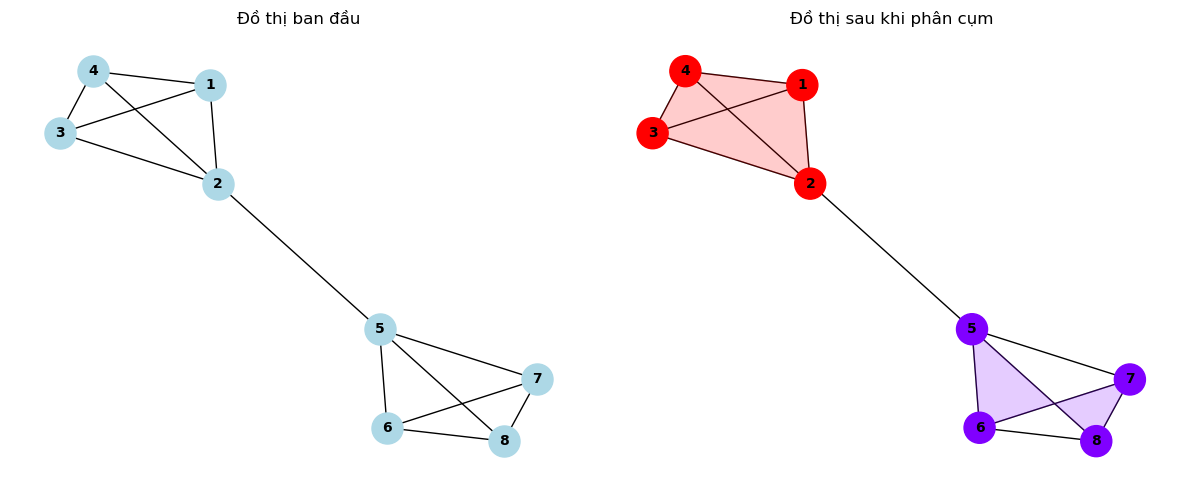

In [16]:
def main():
    print("Tao do thi mau va tinh toan do tuong tu")
    G = create_graph()
    ns = NodeSimilarity(G)

    ns.calculate_similarity_matrix()
    ns.print_similarity_matrix()
    print("\nThực hiện phân cụm...")
    cluster_labels = ns.aplly_spectral_clustering(n_clusters=2)
    ns.visualize_clusters(cluster_labels)
    return G
main()